# Cloud Resource Demand Forecasting - ETL Pipeline

---

## Objectives

1. **Extract**: Load and explore data from Westermo test system
2. **Transform**:
   - Create target variables (Memory, CPU, System Load)
   - Correlation analysis
   - Data cleaning and normalization
3. **Load**: Train/test split

---


## 1. Import Libraries


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings('ignore')

# Display config
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("✓ Libraries imported")


✓ Libraries imported


## 2. Extract - Data Loading


In [21]:
# Load data
df = pd.read_csv('data/system-1.csv')

print(f"Data shape: {df.shape}")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print("\n" + "="*80)

# Display first 5 rows
df.head()


Data shape: (85749, 24)
Rows: 85,749
Columns: 24



,timestamp,load-1m,load-5m,load-15m,sys-mem-swap-total,sys-mem-swap-free,sys-mem-free,sys-mem-cache,sys-mem-buffered,sys-mem-available,sys-mem-total,sys-fork-rate,sys-interrupt-rate,sys-context-switch-rate,sys-thermal,disk-io-time,disk-bytes-read,disk-bytes-written,disk-io-read,disk-io-write,cpu-iowait,cpu-system,cpu-user,server-up
0,0,0.22,0.18,0.18,16953372672,16953372672,2071302144,10307330048,1937584128,15328792576,16662700032,0.80,970.15,2217.20,1.60,0.0076,0.0,16588.8,0.0,2.10,0.0095,0.0240,0.0405,2
1,30,0.26,0.19,0.18,16953372672,16953372672,2072969216,10307371008,1937584128,15330496512,16662700032,0.95,1081.55,2693.70,0.00,0.0060,0.0,14745.6,0.0,1.50,0.0125,0.0270,0.0475,2
2,60,0.16,0.17,0.18,16953372672,16953372672,2071818240,10307375104,1937584128,15329353728,16662700032,0.80,995.40,2275.35,0.00,0.0134,0.0,15564.8,0.0,1.65,0.0135,0.0255,0.0260,2
3,90,0.16,0.17,0.18,16953372672,16953372672,2071830528,10307379200,1937584128,15329370112,16662700032,0.85,1010.65,2302.55,0.00,0.0078,0.0,16179.2,0.0,1.80,0.0160,0.0305,0.0315,2
4,120,0.10,0.15,0.17,16953372672,16953372672,2071859200,10307379200,1937584128,15329398784,16662700032,0.80,971.30,2180.80,1.55,0.0066,0.0,13721.6,0.0,1.70,0.0080,0.0225,0.0270,2


In [22]:
# Column info
print("Data Info:")
print("="*80)
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85749 entries, 0 to 85748
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                85749 non-null  int64  
 1   load-1m                  85749 non-null  float64
 2   load-5m                  85749 non-null  float64
 3   load-15m                 85749 non-null  float64
 4   sys-mem-swap-total       85749 non-null  int64  
 5   sys-mem-swap-free        85749 non-null  int64  
 6   sys-mem-free             85749 non-null  int64  
 7   sys-mem-cache            85749 non-null  int64  
 8   sys-mem-buffered         85749 non-null  int64  
 9   sys-mem-available        85749 non-null  int64  
 10  sys-mem-total            85749 non-null  int64  
 11  sys-fork-rate            85749 non-null  float64
 12  sys-interrupt-rate       85749 non-null  float64
 13  sys-context-switch-rate  85749 non-null  float64
 14  sys-thermal

In [23]:
# Descriptive statistics
print("Descriptive Statistics:")
print("="*80)
df.describe().T


Descriptive Statistics:


,count,mean,std,min,25%,50%,75%,max
timestamp,85749.0,1.293647e+06,7.506097e+05,0.000000e+00,6.431100e+05,1.286220e+06,1.948890e+06,2.592000e+06
load-1m,85749.0,1.297195e-01,2.090386e-01,0.000000e+00,2.000000e-02,7.000000e-02,1.600000e-01,5.060000e+00
load-5m,85749.0,1.216558e-01,1.125109e-01,0.000000e+00,4.000000e-02,9.000000e-02,1.600000e-01,1.270000e+00
load-15m,85749.0,9.800697e-02,7.515568e-02,0.000000e+00,4.000000e-02,9.000000e-02,1.500000e-01,5.100000e-01
sys-mem-swap-total,85749.0,1.695337e+10,0.000000e+00,1.695337e+10,1.695337e+10,1.695337e+10,1.695337e+10,1.695337e+10
sys-mem-swap-free,85749.0,1.695318e+10,2.569240e+05,1.695284e+10,1.695284e+10,1.695337e+10,1.695337e+10,1.695337e+10
sys-mem-free,85749.0,4.234047e+09,3.394397e+09,1.702953e+08,1.806541e+09,2.382049e+09,6.405558e+09,1.551792e+10
sys-mem-cache,85749.0,8.778729e+09,2.686202e+09,4.818125e+08,7.406195e+09,9.988424e+09,1.066275e+10,1.196882e+10
sys-mem-buffered,85749.0,1.740896e+09,4.135548e+08,1.795482e+08,1.317798e+09,1.985241e+09,2.056106e+09,2.152661e+09
sys-mem-available,85749.0,1.559199e+10,1.727195e+08,1.425826e+10,1.544736e+10,1.566714e+10,1.571154e+10,1.595769e+10


## 3. Timestamp Conversion


In [24]:
# Convert timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute

print("✓ Timestamp converted")
print(f"\nData time range:")
print(f"  Start: {df['datetime'].min()}")
print(f"  End: {df['datetime'].max()}")
print(f"  Duration: {df['datetime'].max() - df['datetime'].min()}")


✓ Timestamp converted

Data time range:
  Start: 1970-01-01 00:00:00
  End: 1970-01-31 00:00:00
  Duration: 30 days 00:00:00


## 4. Create Target Variables

### 4.1. Memory Usage Percentage
### 4.2. CPU Total Usage
### 4.3. System Load (1-minute)


In [25]:
# 1. Memory Usage Percentage
df['memory_usage_pct'] = ((df['sys-mem-total'] - df['sys-mem-available']) / df['sys-mem-total']) * 100

# 2. CPU Total Usage
df['cpu_total_usage'] = df['cpu-user'] + df['cpu-system'] + df['cpu-iowait']

# 3. System Load
df['system_load'] = df['load-1m']

print("✓ Target variables created:")
print("  1. memory_usage_pct")
print("  2. cpu_total_usage")
print("  3. system_load")
print("\n" + "="*80)

# Target statistics
target_vars = ['memory_usage_pct', 'cpu_total_usage', 'system_load']
print("\nTarget Variables Statistics:")
df[target_vars].describe().T


✓ Target variables created:
  1. memory_usage_pct
  2. cpu_total_usage
  3. system_load


Target Variables Statistics:


,count,mean,std,min,25%,50%,75%,max
memory_usage_pct,85749.0,6.425797,1.036564,4.231077,5.708348,5.974791,7.293804,14.430087
cpu_total_usage,85749.0,0.104861,0.098521,0.036500,0.057500,0.068000,0.099500,1.691000
system_load,85749.0,0.129720,0.209039,0.000000,0.020000,0.070000,0.160000,5.060000


## 5. Check Missing Values


In [26]:
# Check missing values
missing_values = df.isnull().sum()
missing_pct = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage (%)': missing_pct
})

missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("⚠ Missing values found:")
    print(missing_df)
else:
    print("✓ No missing values")


✓ No missing values


## 6. Distribution Analysis


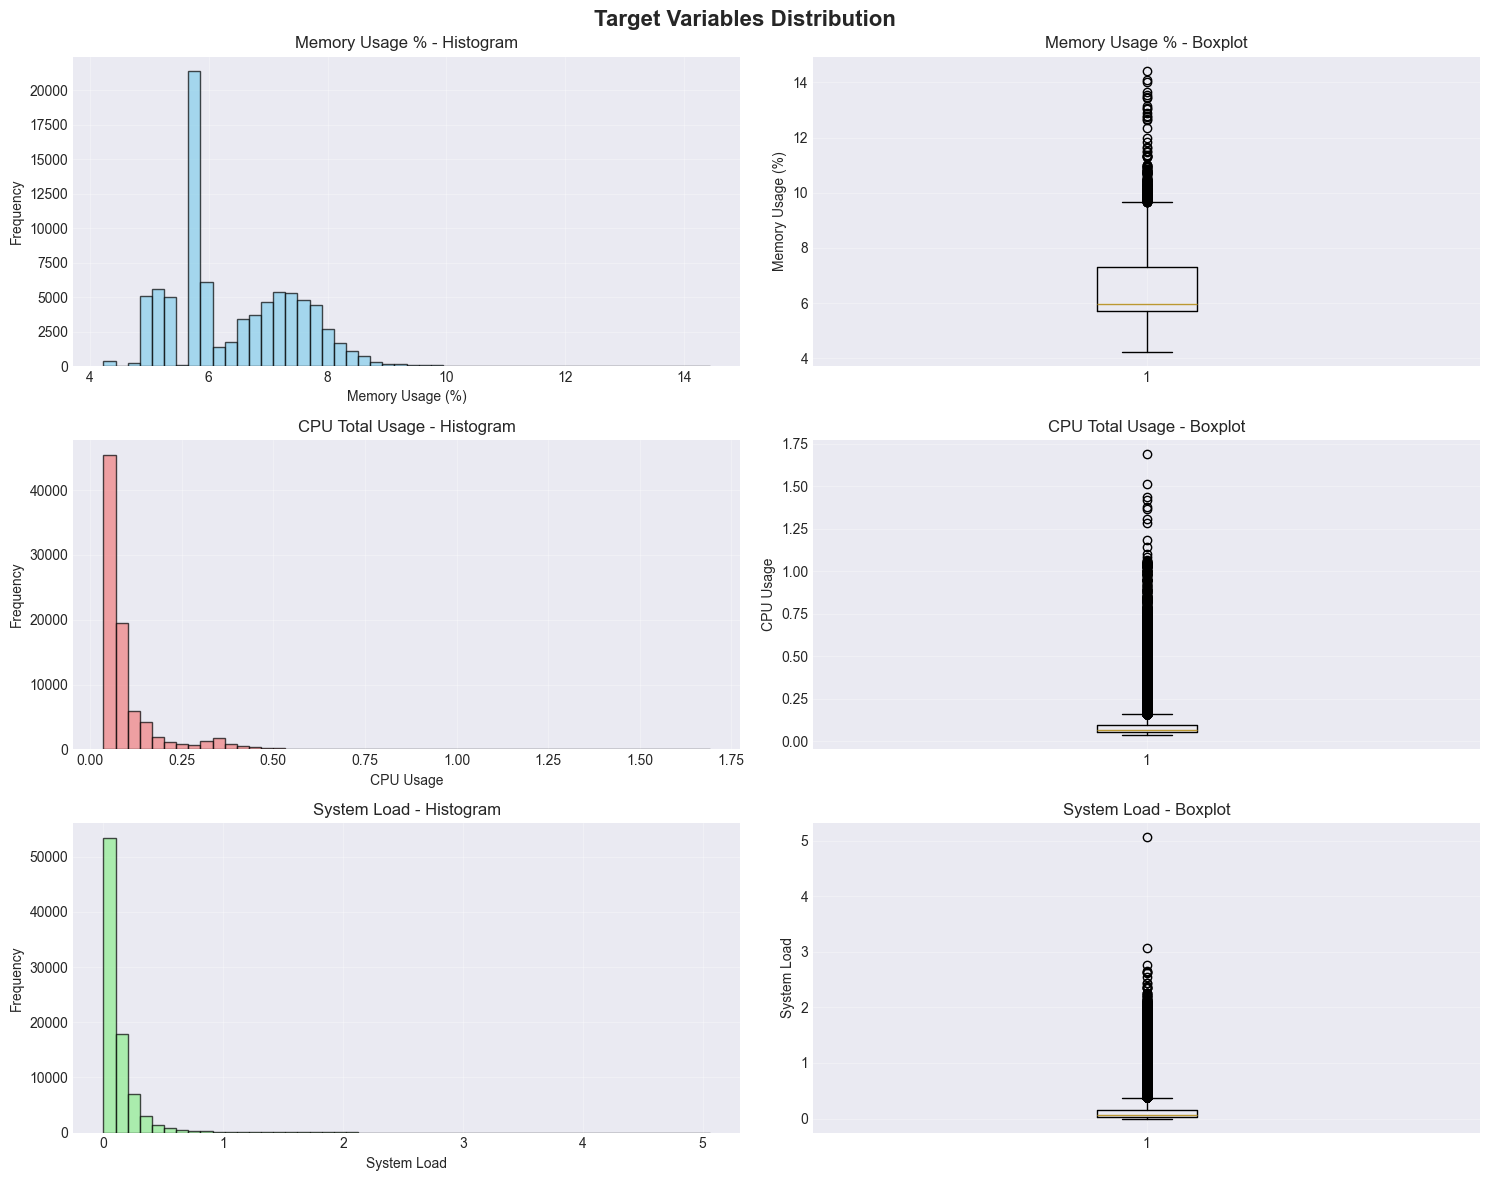

✓ Distribution analysis completed


In [27]:
# Visualize target distributions
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Target Variables Distribution', fontsize=16, fontweight='bold')

# Memory Usage
axes[0, 0].hist(df['memory_usage_pct'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Memory Usage % - Histogram')
axes[0, 0].set_xlabel('Memory Usage (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].boxplot(df['memory_usage_pct'], vert=True)
axes[0, 1].set_title('Memory Usage % - Boxplot')
axes[0, 1].set_ylabel('Memory Usage (%)')
axes[0, 1].grid(True, alpha=0.3)

# CPU Usage
axes[1, 0].hist(df['cpu_total_usage'], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('CPU Total Usage - Histogram')
axes[1, 0].set_xlabel('CPU Usage')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].boxplot(df['cpu_total_usage'], vert=True)
axes[1, 1].set_title('CPU Total Usage - Boxplot')
axes[1, 1].set_ylabel('CPU Usage')
axes[1, 1].grid(True, alpha=0.3)

# System Load
axes[2, 0].hist(df['system_load'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2, 0].set_title('System Load - Histogram')
axes[2, 0].set_xlabel('System Load')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].boxplot(df['system_load'], vert=True)
axes[2, 1].set_title('System Load - Boxplot')
axes[2, 1].set_ylabel('System Load')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Distribution analysis completed")


## 7. Correlation Analysis

### 7.1. Full Correlation Matrix


FULL CORRELATION MATRIX
                          load-1m   load-5m  load-15m  sys-mem-swap-total  \
load-1m                  1.000000  0.755711  0.486082                 NaN   
load-5m                  0.755711  1.000000  0.846606                 NaN   
load-15m                 0.486082  0.846606  1.000000                 NaN   
sys-mem-swap-total            NaN       NaN       NaN                 NaN   
sys-mem-swap-free       -0.019384 -0.036393 -0.061464                 NaN   
sys-mem-free             0.007153  0.015889  0.023870                 NaN   
sys-mem-cache           -0.020952 -0.040134 -0.061031                 NaN   
sys-mem-buffered        -0.002749 -0.006728 -0.008454                 NaN   
sys-mem-available       -0.206388 -0.357638 -0.544092                 NaN   
sys-mem-total                 NaN       NaN       NaN                 NaN   
sys-fork-rate            0.164491  0.168740  0.193820                 NaN   
sys-interrupt-rate       0.148467  0.166672  0.18522

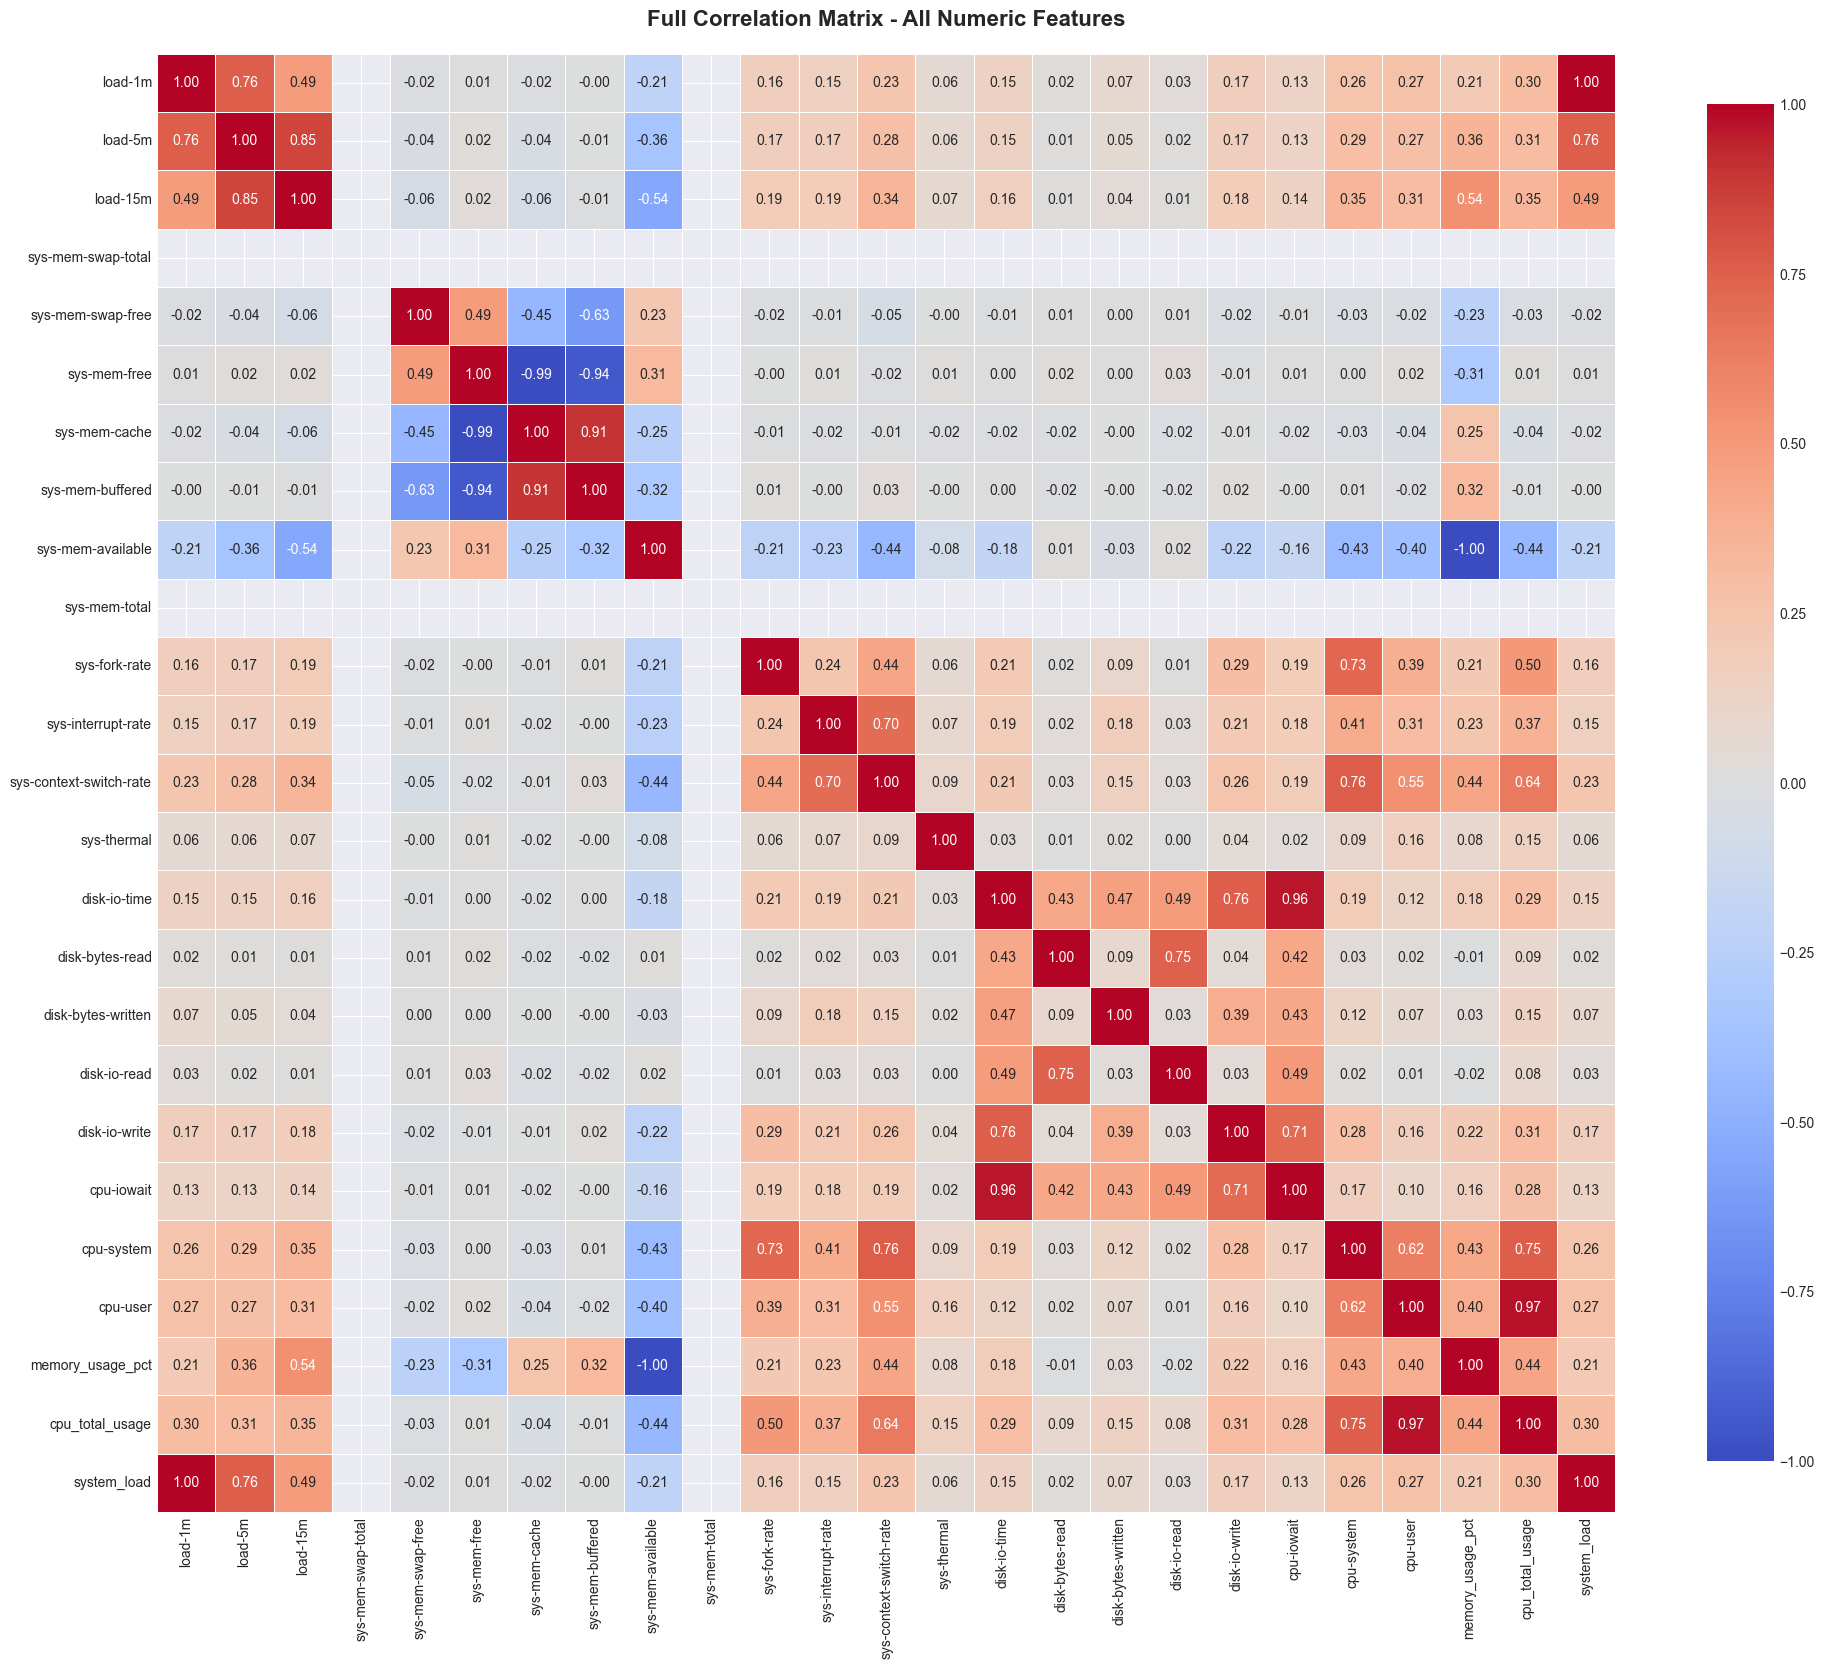

✓ Full correlation matrix created


In [28]:
# Exclude non-numeric columns from correlation analysis
cols_to_exclude = ['timestamp', 'datetime', 'date', 'hour', 'minute', 'server-up']
numeric_cols = [col for col in df.columns if col not in cols_to_exclude and df[col].dtype in ['int64', 'float64']]

# Calculate full correlation matrix
print("="*80)
print("FULL CORRELATION MATRIX")
print("="*80)
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)
print("\n")

# Visualize full correlation matrix
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Full Correlation Matrix - All Numeric Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✓ Full correlation matrix created")


### 7.2. Correlation with Memory Usage


CORRELATION WITH MEMORY USAGE PERCENTAGE
memory_usage_pct           1.000000
load-15m                   0.544092
sys-context-switch-rate    0.443128
cpu_total_usage            0.442328
cpu-system                 0.427882
cpu-user                   0.397259
load-5m                    0.357638
sys-mem-buffered           0.319326
sys-mem-cache              0.250398
sys-interrupt-rate         0.234523
disk-io-write              0.218152
sys-fork-rate              0.212857
load-1m                    0.206388
system_load                0.206388
disk-io-time               0.176227
cpu-iowait                 0.158229
sys-thermal                0.083074
disk-bytes-written         0.031901
disk-bytes-read           -0.013719
disk-io-read              -0.015164
sys-mem-swap-free         -0.228813
sys-mem-free              -0.313789
sys-mem-available         -1.000000
sys-mem-swap-total              NaN
sys-mem-total                   NaN
Name: memory_usage_pct, dtype: float64


High correlation f

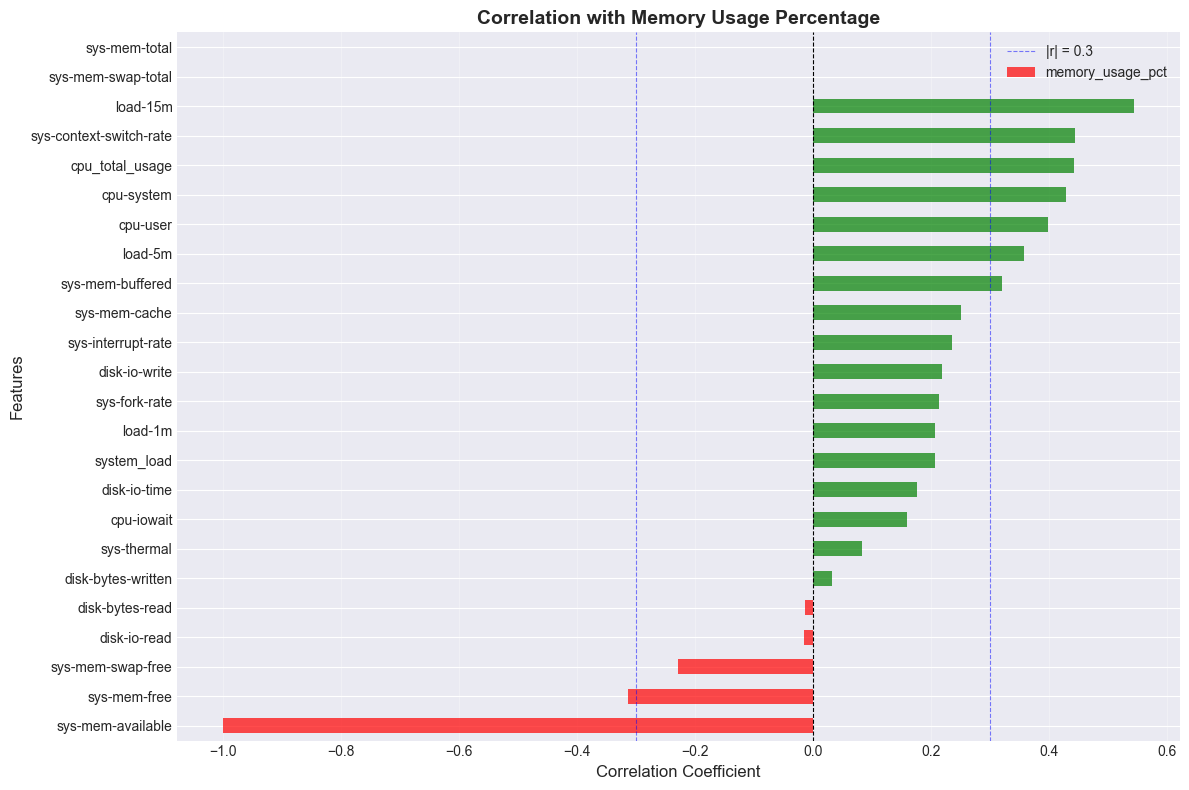

In [29]:
# Correlation with Memory Usage
memory_corr = corr_matrix['memory_usage_pct'].sort_values(ascending=False)

print("="*80)
print("CORRELATION WITH MEMORY USAGE PERCENTAGE")
print("="*80)
print(memory_corr)
print("\n")

# High correlation features (|r| > 0.3)
high_corr_memory = memory_corr[abs(memory_corr) > 0.3]
high_corr_memory = high_corr_memory[high_corr_memory.index != 'memory_usage_pct']

print(f"High correlation features (|r| > 0.3): {len(high_corr_memory)}")
print("-"*80)
for var, corr_val in high_corr_memory.items():
    print(f"  {var:35s}: {corr_val:7.4f}")

# Visualize
plt.figure(figsize=(12, 8))
memory_corr_plot = memory_corr.drop('memory_usage_pct').sort_values()
colors = ['red' if x < 0 else 'green' for x in memory_corr_plot]

memory_corr_plot.plot(kind='barh', color=colors, alpha=0.7)
plt.title('Correlation with Memory Usage Percentage', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(x=0.3, color='blue', linestyle='--', linewidth=0.8, alpha=0.5, label='|r| = 0.3')
plt.axvline(x=-0.3, color='blue', linestyle='--', linewidth=0.8, alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


### 7.3. Correlation with CPU Usage


CORRELATION WITH CPU TOTAL USAGE
cpu_total_usage            1.000000
cpu-user                   0.970127
cpu-system                 0.751243
sys-context-switch-rate    0.642681
sys-fork-rate              0.503488
memory_usage_pct           0.442328
sys-interrupt-rate         0.368007
load-15m                   0.348714
load-5m                    0.307352
disk-io-write              0.305169
load-1m                    0.299498
system_load                0.299498
disk-io-time               0.287897
cpu-iowait                 0.276266
sys-thermal                0.153941
disk-bytes-written         0.147675
disk-bytes-read            0.085728
disk-io-read               0.083796
sys-mem-free               0.013908
sys-mem-buffered          -0.012023
sys-mem-swap-free         -0.026691
sys-mem-cache             -0.041721
sys-mem-available         -0.442328
sys-mem-swap-total              NaN
sys-mem-total                   NaN
Name: cpu_total_usage, dtype: float64


High correlation features (

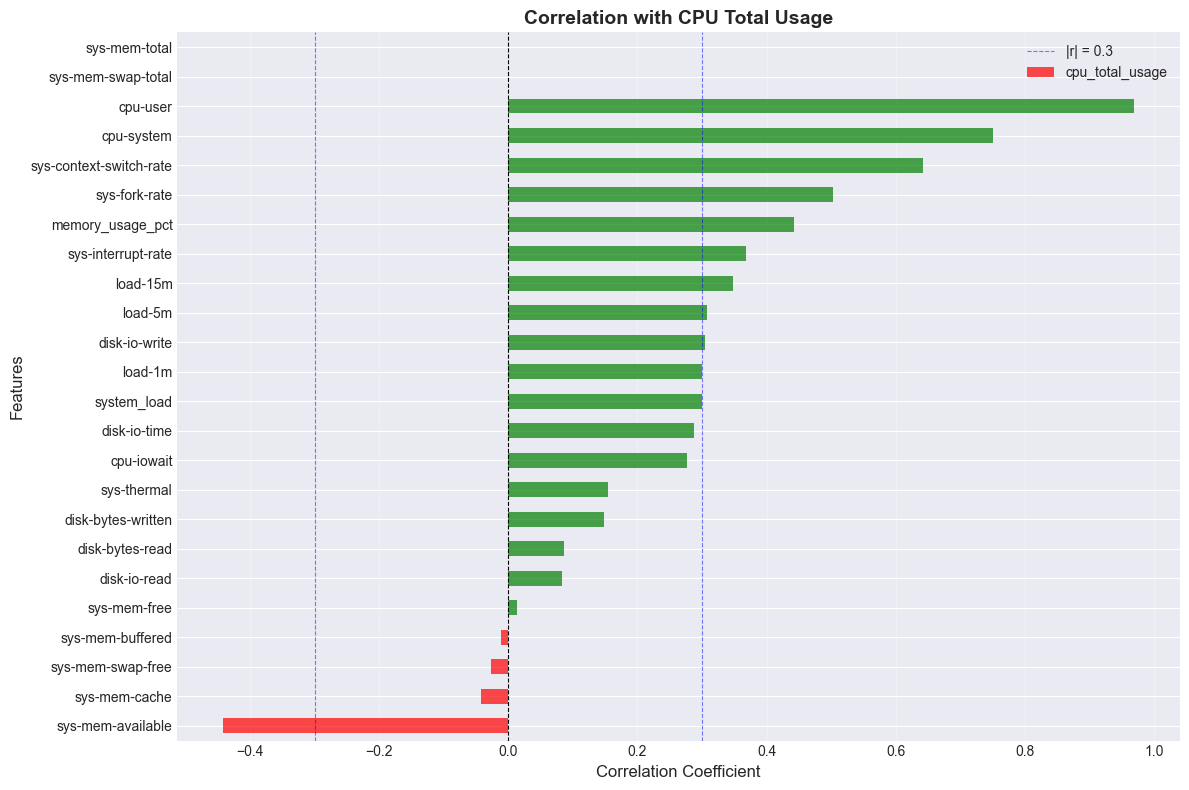

In [30]:
# Correlation with CPU Usage
cpu_corr = corr_matrix['cpu_total_usage'].sort_values(ascending=False)

print("="*80)
print("CORRELATION WITH CPU TOTAL USAGE")
print("="*80)
print(cpu_corr)
print("\n")

# High correlation features (|r| > 0.3)
high_corr_cpu = cpu_corr[abs(cpu_corr) > 0.3]
high_corr_cpu = high_corr_cpu[high_corr_cpu.index != 'cpu_total_usage']

print(f"High correlation features (|r| > 0.3): {len(high_corr_cpu)}")
print("-"*80)
for var, corr_val in high_corr_cpu.items():
    print(f"  {var:35s}: {corr_val:7.4f}")

# Visualize
plt.figure(figsize=(12, 8))
cpu_corr_plot = cpu_corr.drop('cpu_total_usage').sort_values()
colors = ['red' if x < 0 else 'green' for x in cpu_corr_plot]

cpu_corr_plot.plot(kind='barh', color=colors, alpha=0.7)
plt.title('Correlation with CPU Total Usage', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(x=0.3, color='blue', linestyle='--', linewidth=0.8, alpha=0.5, label='|r| = 0.3')
plt.axvline(x=-0.3, color='blue', linestyle='--', linewidth=0.8, alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


### 7.4. Correlation with System Load


CORRELATION WITH SYSTEM LOAD (1-minute)
load-1m                    1.000000
system_load                1.000000
load-5m                    0.755711
load-15m                   0.486082
cpu_total_usage            0.299498
cpu-user                   0.273312
cpu-system                 0.256463
sys-context-switch-rate    0.234466
memory_usage_pct           0.206388
disk-io-write              0.168158
sys-fork-rate              0.164491
sys-interrupt-rate         0.148467
disk-io-time               0.145364
cpu-iowait                 0.130661
disk-bytes-written         0.071724
sys-thermal                0.062180
disk-io-read               0.026421
disk-bytes-read            0.023070
sys-mem-free               0.007153
sys-mem-buffered          -0.002749
sys-mem-swap-free         -0.019384
sys-mem-cache             -0.020952
sys-mem-available         -0.206388
sys-mem-swap-total              NaN
sys-mem-total                   NaN
Name: system_load, dtype: float64


High correlation feature

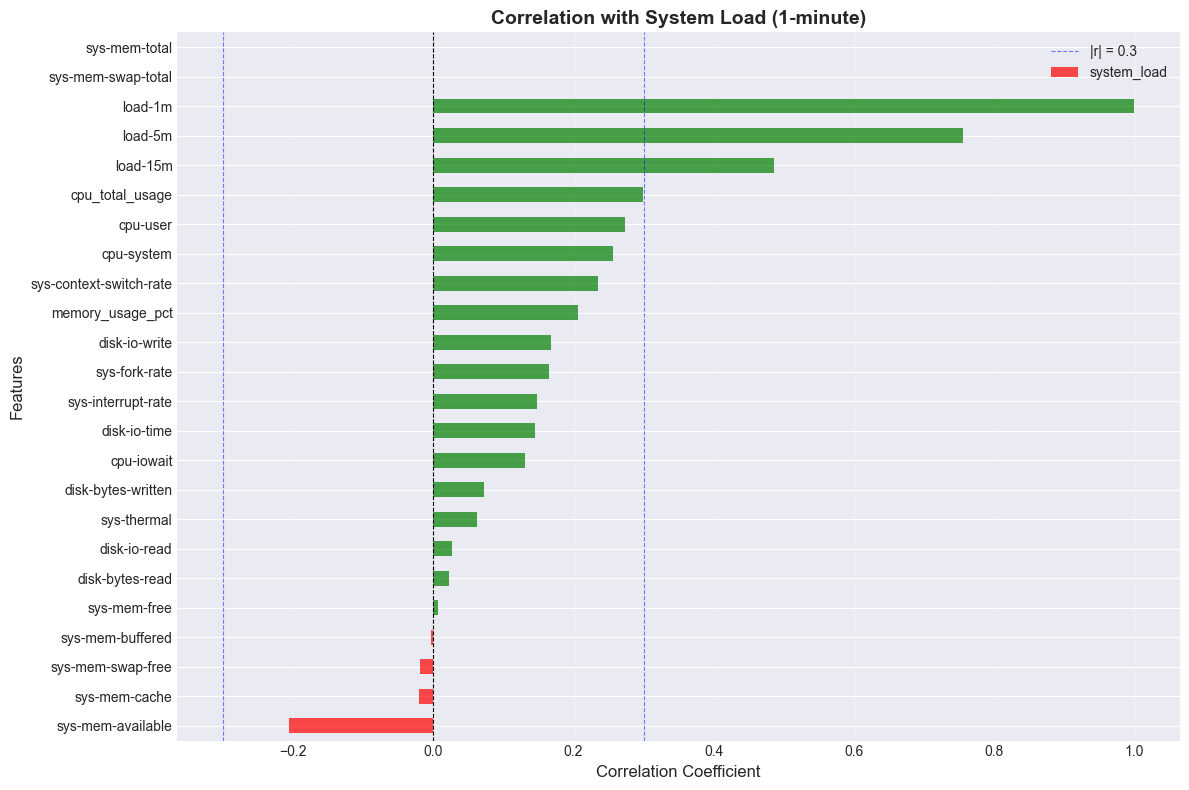

✓ Correlation analysis completed


In [31]:
# Correlation with System Load
load_corr = corr_matrix['system_load'].sort_values(ascending=False)

print("="*80)
print("CORRELATION WITH SYSTEM LOAD (1-minute)")
print("="*80)
print(load_corr)
print("\n")

# High correlation features (|r| > 0.3)
high_corr_load = load_corr[abs(load_corr) > 0.3]
high_corr_load = high_corr_load[high_corr_load.index != 'system_load']

print(f"High correlation features (|r| > 0.3): {len(high_corr_load)}")
print("-"*80)
for var, corr_val in high_corr_load.items():
    print(f"  {var:35s}: {corr_val:7.4f}")

# Visualize
plt.figure(figsize=(12, 8))
load_corr_plot = load_corr.drop('system_load').sort_values()
colors = ['red' if x < 0 else 'green' for x in load_corr_plot]

load_corr_plot.plot(kind='barh', color=colors, alpha=0.7)
plt.title('Correlation with System Load (1-minute)', fontsize=14, fontweight='bold')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(x=0.3, color='blue', linestyle='--', linewidth=0.8, alpha=0.5, label='|r| = 0.3')
plt.axvline(x=-0.3, color='blue', linestyle='--', linewidth=0.8, alpha=0.5)
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("✓ Correlation analysis completed")


## 8. Data Cleaning


In [32]:
# Create copy for cleaning
df_cleaned = df.copy()

print("Starting data cleaning...")
print("="*80)

# 1. Handle missing values
if df_cleaned.isnull().sum().sum() > 0:
    print("⚠ Handling missing values...")
    # Forward fill for time series data
    df_cleaned = df_cleaned.fillna(method='ffill')
    # Backward fill for first values
    df_cleaned = df_cleaned.fillna(method='bfill')
    print(f"✓ Missing values handled")
else:
    print("✓ No missing values")

# 2. Remove constant columns (no variance)
# Only check std for numeric columns to avoid the TypeError
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
constant_cols = []
for col in numeric_cols:
    if df_cleaned[col].std() == 0:
        constant_cols.append(col)
# If you want to also remove constant non-numeric columns, check unique count for non-numeric columns:
for col in df_cleaned.select_dtypes(exclude=[np.number]).columns:
    if df_cleaned[col].nunique() == 1:
        constant_cols.append(col)

if constant_cols:
    print(f"\n⚠ Removing {len(constant_cols)} constant columns:")
    for col in constant_cols:
        print(f"  - {col}")
    df_cleaned = df_cleaned.drop(columns=constant_cols)
else:
    print("\n✓ No constant columns")

# 3. Check for invalid negative values
negative_cols = []
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    if col not in ['cpu-iowait', 'cpu-system', 'cpu-user'] and (df_cleaned[col] < 0).any():
        negative_cols.append(col)

if negative_cols:
    print(f"\nFound negative values in {len(negative_cols)} columns (clipping to 0):")
    for col in negative_cols:
        print(f"  - {col}")
        df_cleaned[col] = df_cleaned[col].clip(lower=0)
else:
    print("\n✓ No invalid negative values")

print("\n" + "="*80)
print(f"✓ Data cleaning completed")
print(f"  Before: {df.shape}")
print(f"  After: {df_cleaned.shape}")


Starting data cleaning...
✓ No missing values

⚠ Removing 2 constant columns:
  - sys-mem-swap-total
  - sys-mem-total

✓ No invalid negative values

✓ Data cleaning completed
  Before: (85749, 31)
  After: (85749, 29)


## 9. Data Normalization

Using StandardScaler for Z-score normalization


In [33]:
# Select numeric columns to normalize
cols_to_normalize = [col for col in df_cleaned.select_dtypes(include=[np.number]).columns 
                     if col not in ['timestamp', 'hour', 'minute']]

print(f"Features to normalize: {len(cols_to_normalize)}")
print("\nPerforming normalization...")

# Create DataFrame for normalized data
df_normalized = df_cleaned.copy()

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_normalized[cols_to_normalize] = scaler.fit_transform(df_cleaned[cols_to_normalize])

print("✓ Normalization completed")
print("\n" + "="*80)
print("Statistics after normalization:")
df_normalized[target_vars].describe().T


Features to normalize: 24

Performing normalization...
✓ Normalization completed

Statistics after normalization:


,count,mean,std,min,25%,50%,75%,max
memory_usage_pct,85749.0,4.295623e-16,1.000006,-2.117315,-0.692145,-0.435100,0.837394,7.721993
cpu_total_usage,85749.0,1.133567e-16,1.000006,-0.693875,-0.480722,-0.374145,-0.054414,16.099586
system_load,85749.0,7.291952e-17,1.000006,-0.620557,-0.524880,-0.285688,0.144857,23.585639


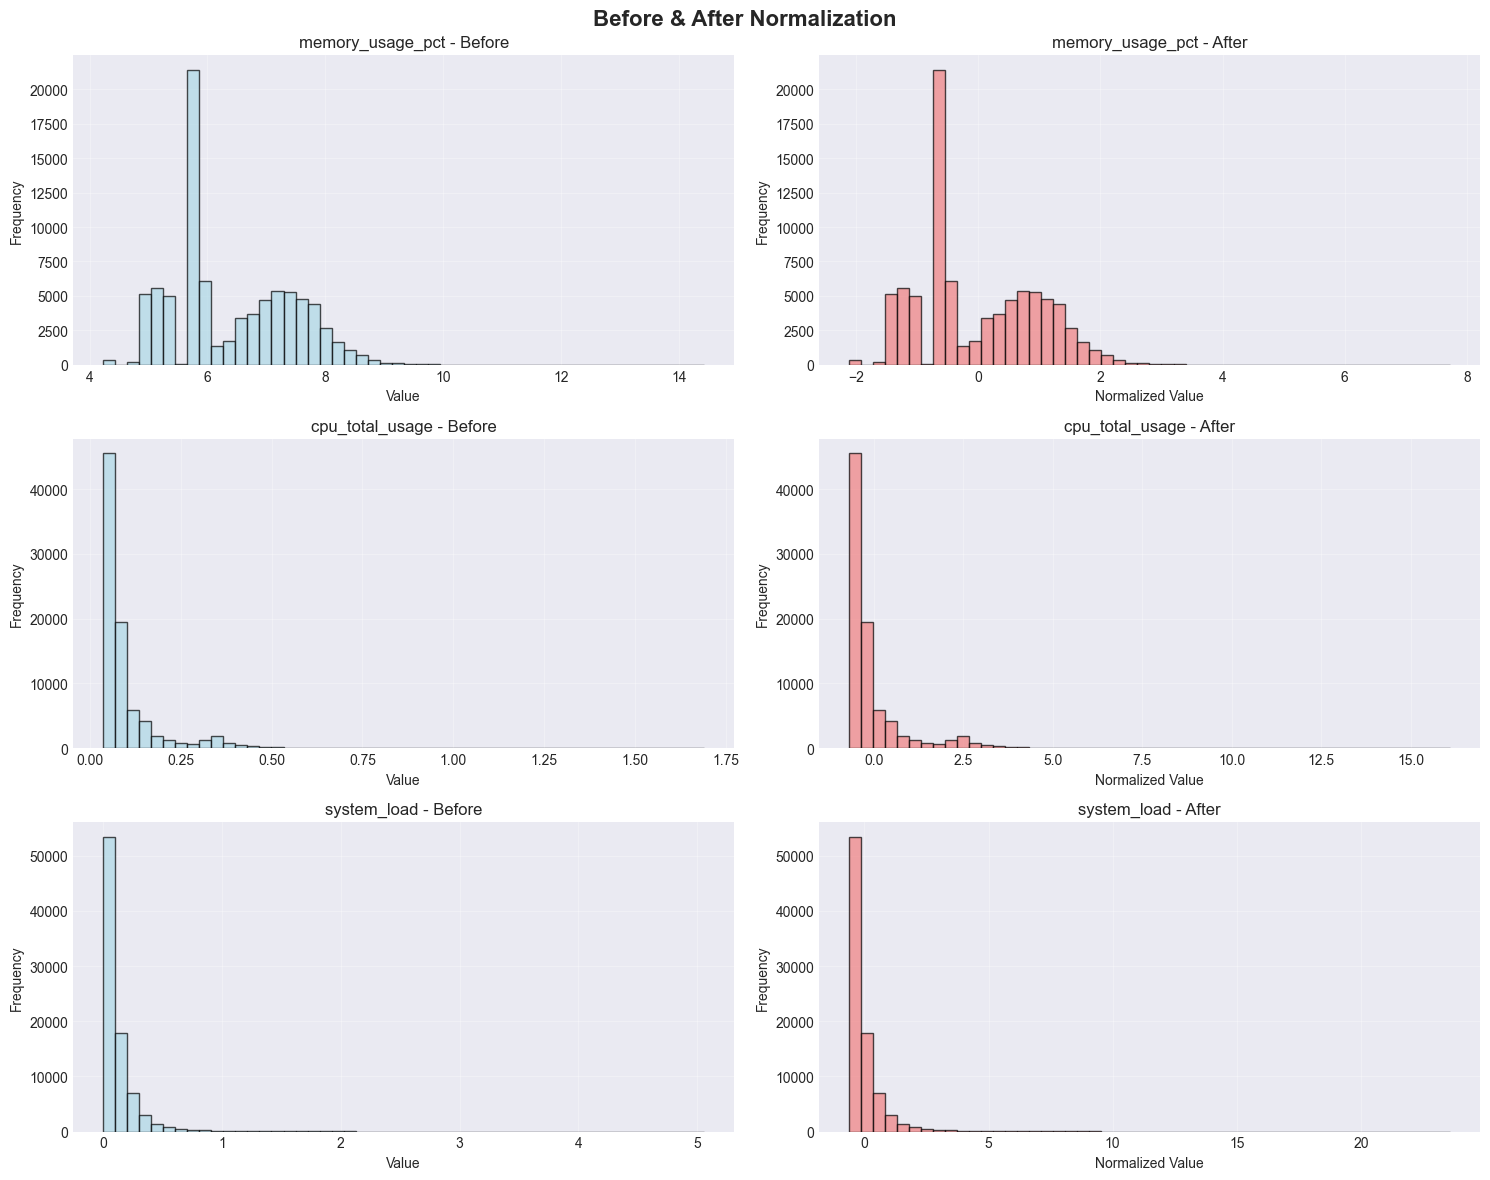

In [34]:
# Visualize normalization effect
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Before & After Normalization', fontsize=16, fontweight='bold')

for idx, target in enumerate(target_vars):
    # Before
    axes[idx, 0].hist(df_cleaned[target], bins=50, color='lightblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'{target} - Before')
    axes[idx, 0].set_xlabel('Value')
    axes[idx, 0].set_ylabel('Frequency')
    axes[idx, 0].grid(True, alpha=0.3)
    
    # After
    axes[idx, 1].hist(df_normalized[target], bins=50, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'{target} - After')
    axes[idx, 1].set_xlabel('Normalized Value')
    axes[idx, 1].set_ylabel('Frequency')
    axes[idx, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


**Important Note - Data Leakage Prevention:**

Each target variable is calculated from specific component variables. To prevent data leakage, these components are excluded from the feature set:

| Target Variable | Excluded Components | Reason |
|----------------|---------------------|---------|
| `memory_usage_pct` | `sys-mem-total`, `sys-mem-available` | Used to calculate memory_usage_pct |
| `cpu_total_usage` | `cpu-user`, `cpu-system`, `cpu-iowait` | Sum of these = cpu_total_usage |
| `system_load` | `load-1m` | system_load is identical to load-1m |


**Feature Selection Strategy:**

Using **High Correlation Features Only** (|r| > 0.3)

Benefits:
- Simpler, more interpretable models
- Faster training
- Less risk of overfitting
- Focuses on most relevant features
- Good for Linear Regression, ARIMA, and time series models


## 10. Train/Test Split

Split data:
- Training set: 80%
- Test set: 20%

**Note**: Sequential split to preserve time order


In [35]:
# Prepare datasets for each target
test_size = 0.2
random_state = 42

print("="*80)
print("DATA SPLITTING - High Correlation Features Only")
print("="*80)
print(f"Train size: {(1-test_size)*100:.0f}%")
print(f"Test size: {test_size*100:.0f}%")
print(f"Random state: {random_state}")
print(f"Feature selection: |correlation| > 0.3")
print("\n")

# Dictionary to store datasets
datasets = {}

for target in target_vars:
    print(f"\n{'='*80}")
    print(f"Target: {target}")
    print(f"{'='*80}")
    
    # Select features (exclude target and non-feature columns)
    base_exclude = ['timestamp', 'datetime', 'date', 'hour', 'minute'] + target_vars
    
    # Exclude component variables to prevent data leakage
    target_specific_exclude = {
        'memory_usage_pct': ['sys-mem-total', 'sys-mem-available'],  # components of memory_usage_pct
        'cpu_total_usage': ['cpu-user', 'cpu-system', 'cpu-iowait'],  # components of cpu_total_usage
        'system_load': ['load-1m']  # system_load = load-1m
    }
    
    exclude_cols = base_exclude + target_specific_exclude.get(target, [])
    all_available_cols = [col for col in df_normalized.columns if col not in exclude_cols]
    
    print(f"  Excluded components: {target_specific_exclude.get(target, [])}")
    
    # Get high correlation features for this target
    if target == 'memory_usage_pct':
        high_corr_vars = high_corr_memory
    elif target == 'cpu_total_usage':
        high_corr_vars = high_corr_cpu
    else:  # system_load
        high_corr_vars = high_corr_load
    
    # Filter to get only available high correlation features
    feature_cols = [col for col in high_corr_vars.index if col in all_available_cols]
    
    print(f"  Selected features (|r| > 0.3): {len(feature_cols)}")
    
    # Prepare X and y
    X = df_normalized[feature_cols]
    y = df_normalized[target]
    
    # Sequential split to preserve time order
    split_idx = int(len(df_normalized) * (1 - test_size))
    
    X_train = X.iloc[:split_idx]
    X_test = X.iloc[split_idx:]
    y_train = y.iloc[:split_idx]
    y_test = y.iloc[split_idx:]
    
    # Store datasets
    datasets[target] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test,
        'features': feature_cols
    }
    
    print(f"  X_train: {X_train.shape} | X_test: {X_test.shape}")
    print(f"  y_train: mean={y_train.mean():.4f}, std={y_train.std():.4f}")
    print(f"  y_test: mean={y_test.mean():.4f}, std={y_test.std():.4f}")

print("\n" + "="*80)
print("✓ Data splitting completed")


DATA SPLITTING - High Correlation Features Only
Train size: 80%
Test size: 20%
Random state: 42
Feature selection: |correlation| > 0.3



Target: memory_usage_pct
  Excluded components: ['sys-mem-total', 'sys-mem-available']
  Selected features (|r| > 0.3): 7
  X_train: (68599, 7) | X_test: (17150, 7)
  y_train: mean=0.1135, std=0.9949
  y_test: mean=-0.4541, std=0.8849

Target: cpu_total_usage
  Excluded components: ['cpu-user', 'cpu-system', 'cpu-iowait']
  Selected features (|r| > 0.3): 7
  X_train: (68599, 7) | X_test: (17150, 7)
  y_train: mean=0.0153, std=1.0049
  y_test: mean=-0.0613, std=0.9780

Target: system_load
  Excluded components: ['load-1m']
  Selected features (|r| > 0.3): 2
  X_train: (68599, 2) | X_test: (17150, 2)
  y_train: mean=0.0114, std=1.0048
  y_test: mean=-0.0455, std=0.9792

✓ Data splitting completed


In [36]:
print("="*80)
print("ETL PROCESS SUMMARY")
print("="*80)

print("\n1. ORIGINAL DATA:")
print(f"   - Rows: {df.shape[0]:,}")
print(f"   - Columns: {df.shape[1]}")
print(f"   - Time span: {df['datetime'].max() - df['datetime'].min()}")

print("\n2. TARGET VARIABLES:")
for i, target in enumerate(target_vars, 1):
    print(f"   {i}. {target}")

print("\n3. DATA QUALITY:")
print(f"   - Missing values: {df_cleaned.isnull().sum().sum()}")
print(f"   - Duplicate rows: {df_cleaned.duplicated().sum()}")
print(f"   - Constant columns removed: {len(constant_cols) if constant_cols else 0}")

print("\n4. CORRELATIONS:")
print(f"   - Memory Usage: {len(high_corr_memory)} features with |r| > 0.3")
print(f"   - CPU Usage: {len(high_corr_cpu)} features with |r| > 0.3")
print(f"   - System Load: {len(high_corr_load)} features with |r| > 0.3")

print("\n5. DATA SPLIT:")
print(f"   - Training: {datasets[target_vars[0]]['X_train'].shape[0]:,} samples (80%)")
print(f"   - Test: {datasets[target_vars[0]]['X_test'].shape[0]:,} samples (20%)")
print(f"   - Sequential split (preserves time order)")

print("\n6. DATA LEAKAGE PREVENTION:")
print("   Component variables excluded from features:")
print("   - memory_usage_pct: sys-mem-total, sys-mem-available")
print("   - cpu_total_usage: cpu-user, cpu-system, cpu-iowait")
print("   - system_load: load-1m")

print("\n7. FEATURE SELECTION:")
print("   High Correlation Only (|r| > 0.3):")
for target in target_vars:
    n_features = len(datasets[target]['features'])
    print(f"     • {target}: {n_features} features")

print("\n" + "="*80)
print("✓ ETL PROCESS COMPLETED")
print("="*80)


ETL PROCESS SUMMARY

1. ORIGINAL DATA:
   - Rows: 85,749
   - Columns: 31
   - Time span: 30 days 00:00:00

2. TARGET VARIABLES:
   1. memory_usage_pct
   2. cpu_total_usage
   3. system_load

3. DATA QUALITY:
   - Missing values: 0
   - Duplicate rows: 0
   - Constant columns removed: 2

4. CORRELATIONS:
   - Memory Usage: 9 features with |r| > 0.3
   - CPU Usage: 10 features with |r| > 0.3
   - System Load: 3 features with |r| > 0.3

5. DATA SPLIT:
   - Training: 68,599 samples (80%)
   - Test: 17,150 samples (20%)
   - Sequential split (preserves time order)

6. DATA LEAKAGE PREVENTION:
   Component variables excluded from features:
   - memory_usage_pct: sys-mem-total, sys-mem-available
   - cpu_total_usage: cpu-user, cpu-system, cpu-iowait
   - system_load: load-1m

7. FEATURE SELECTION:
   High Correlation Only (|r| > 0.3):
     • memory_usage_pct: 7 features
     • cpu_total_usage: 7 features
     • system_load: 2 features

✓ ETL PROCESS COMPLETED


In [37]:
# Display selected features for each target
print("\nSELECTED FEATURES (High Correlation Only):")
print("="*80)

for target in target_vars:
    features = datasets[target]['features']
    print(f"\n{target.upper()} ({len(features)} features with |r| > 0.3):")
    print("-" * 80)
    
    # Get correlation values for display
    if target == 'memory_usage_pct':
        corr_vals = high_corr_memory
    elif target == 'cpu_total_usage':
        corr_vals = high_corr_cpu
    else:
        corr_vals = high_corr_load
    
    for i, feature in enumerate(features, 1):
        corr_val = corr_vals[feature] if feature in corr_vals.index else 0
        print(f"  {i:2d}. {feature:30s}  (r = {corr_val:6.3f})")
    print()



SELECTED FEATURES (High Correlation Only):

MEMORY_USAGE_PCT (7 features with |r| > 0.3):
--------------------------------------------------------------------------------
   1. load-15m                        (r =  0.544)
   2. sys-context-switch-rate         (r =  0.443)
   3. cpu-system                      (r =  0.428)
   4. cpu-user                        (r =  0.397)
   5. load-5m                         (r =  0.358)
   6. sys-mem-buffered                (r =  0.319)
   7. sys-mem-free                    (r = -0.314)


CPU_TOTAL_USAGE (7 features with |r| > 0.3):
--------------------------------------------------------------------------------
   1. sys-context-switch-rate         (r =  0.643)
   2. sys-fork-rate                   (r =  0.503)
   3. sys-interrupt-rate              (r =  0.368)
   4. load-15m                        (r =  0.349)
   5. load-5m                         (r =  0.307)
   6. disk-io-write                   (r =  0.305)
   7. sys-mem-available              

## 12. Export Processed Data (Optional)


In [38]:
# Save feature metadata (for reference)
import json

feature_metadata = {}
for target in target_vars:
    features = datasets[target]['features']
    
    # Get correlation values
    if target == 'memory_usage_pct':
        corr_vals = high_corr_memory
    elif target == 'cpu_total_usage':
        corr_vals = high_corr_cpu
    else:
        corr_vals = high_corr_load
    
    feature_metadata[target] = {
        'n_features': len(features),
        'features': features,
        'correlations': {feat: float(corr_vals[feat]) for feat in features if feat in corr_vals.index}
    }

# Save to JSON
with open(f'{output_dir}/feature_metadata.json', 'w') as f:
    json.dump(feature_metadata, f, indent=2)

print(f"✓ Saved: {output_dir}/feature_metadata.json")


✓ Saved: processed_data/feature_metadata.json


In [39]:
# Create output directory
import os

output_dir = 'processed_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"✓ Created: {output_dir}")

# Save cleaned data
df_cleaned.to_csv(f'{output_dir}/cleaned_data.csv', index=False)
print(f"✓ Saved: {output_dir}/cleaned_data.csv")

# Save normalized data
df_normalized.to_csv(f'{output_dir}/normalized_data.csv', index=False)
print(f"✓ Saved: {output_dir}/normalized_data.csv")

# Save train/test sets for each target
for target in target_vars:
    target_dir = f'{output_dir}/{target}'
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)
    
    datasets[target]['X_train'].to_csv(f'{target_dir}/X_train.csv', index=False)
    datasets[target]['X_test'].to_csv(f'{target_dir}/X_test.csv', index=False)
    datasets[target]['y_train'].to_csv(f'{target_dir}/y_train.csv', index=False)
    datasets[target]['y_test'].to_csv(f'{target_dir}/y_test.csv', index=False)
    
    print(f"✓ Saved: {target}")

print("\n" + "="*80)
print("✓ Export completed")
print(f"  Location: {output_dir}/")
print("="*80)


✓ Saved: processed_data/cleaned_data.csv
✓ Saved: processed_data/normalized_data.csv
✓ Saved: memory_usage_pct
✓ Saved: cpu_total_usage
✓ Saved: system_load

✓ Export completed
  Location: processed_data/
